In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.genfromtxt("faces.txt", delimiter=None)
plt.figure()
print(X.shape)

(4916, 576)


<Figure size 640x480 with 0 Axes>

The matrix represents the dataset of human faces, where there are 4916 pictures each with 576 pixels.

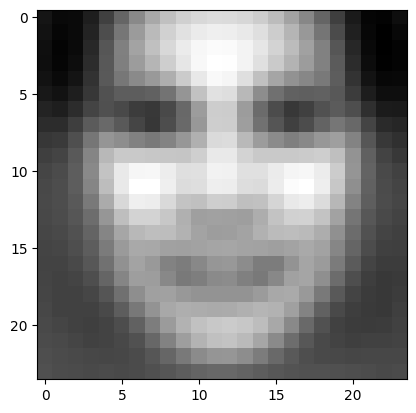

In [3]:
mu = np.mean(X, axis=0, keepdims=True)
img = np.reshape(mu,(24,24))
plt.imshow( img.T , cmap="gray")

Derive and plot the mean face image.

In [4]:
X0 = X - mu

Gain the mean subtracted matrix.

In [5]:
U, S, Vh = np.linalg.svd(X0, full_matrices=False)
Sigma = np.diag(S)
print(U.shape)
print(Sigma.shape)
print(Vh.shape)

(4916, 576)
(576, 576)
(576, 576)


Singular Vector Decomposition

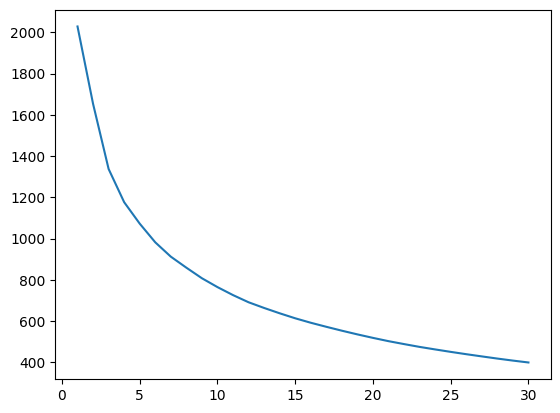

In [6]:
W = U.dot(Sigma)
K = list(range(1, 31))
mse = np.zeros((len(K),))
for k in K:
    Xhat0 = W[:,:k].dot( Vh[0:k,:] )
    mse[k - 1] = np.mean( (X0 - Xhat0) ** 2 )
plt.plot(K, mse)
plt.show()

For each K from 1 to 30, compute the mean squared error in the SVD approximation and plot as a line graph.

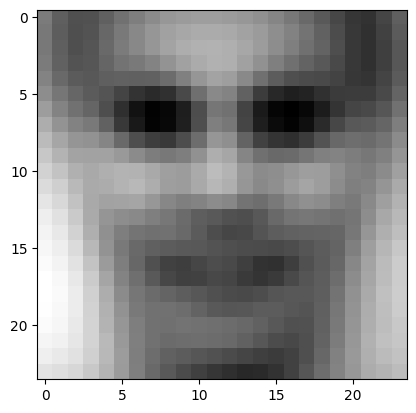

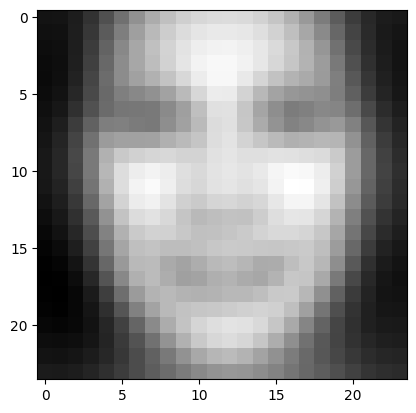

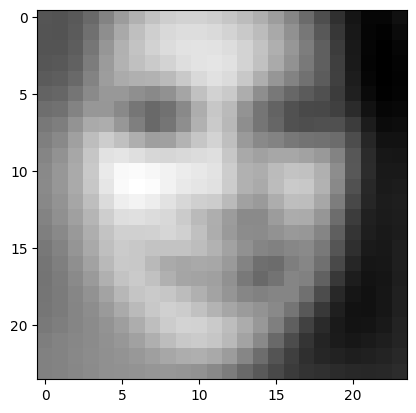

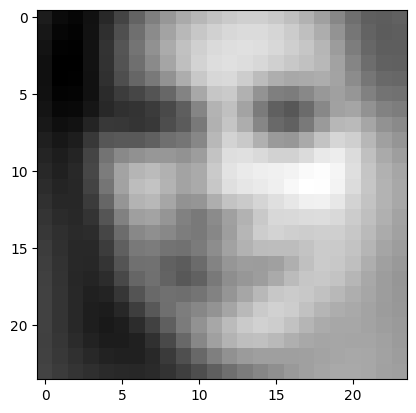

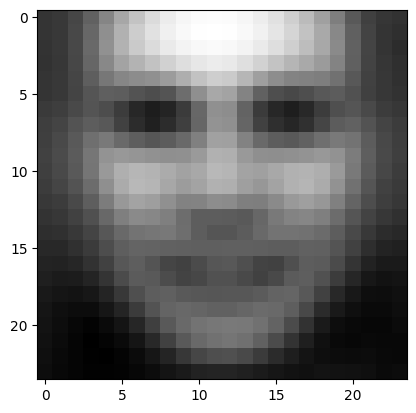

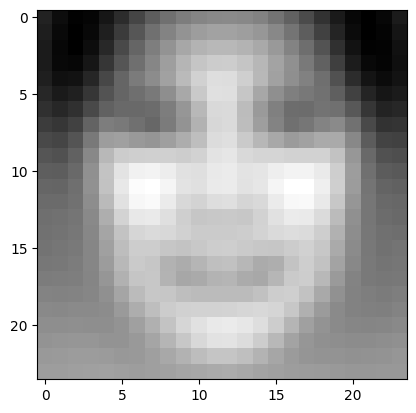

In [7]:
imgs = []
for j in [1, 2, 3]:
    alpha = 2 * np.median(np.abs(W[:,j]))
    img = np.reshape(mu+alpha * Vh[j,:],(24,24))
    plt.imshow( img.T , cmap="gray")
    plt.show()
    img = np.reshape(mu-alpha * Vh[j,:],(24,24))
    plt.imshow( img.T , cmap="gray")
    plt.show()

Display the first three principal directions of the data by computing μ + αV[j:] and μ - αV[j:], where α is the scale factor